In [24]:
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv('s3://data-files-http/customer_data.csv')

In [46]:
# 1. How many rows and columns are there?
print(df.shape)

(99933, 17)


In [47]:
# 2. What are the column names?
print(df.columns)

Index(['UCID', ' GENDER', ' AGE_GROUP2', ' MEMBERSHIP_DATE',
       ' BRAND_REPORTING', ' LOCATION_NAME_REPORTING', ' STORE_COUNTRY',
       ' BUSINESS_CHANNEL', ' INVOICE_NO', '  NET_SALES_AMOUNT ', ' SALES_QTY',
       '  DISCOUNT_AMOUNT ', ' DAY_DT', ' DIV_NAME', ' DEPT_NAME',
       ' CLASS_NAME', ' SUBCLASS_NAME'],
      dtype='object')


In [48]:
df.columns = df.columns.str.strip()

In [49]:
df.isnull().sum()

UCID                          0
GENDER                        0
AGE_GROUP2                    0
MEMBERSHIP_DATE            2327
BRAND_REPORTING               0
LOCATION_NAME_REPORTING       0
STORE_COUNTRY                 0
BUSINESS_CHANNEL              0
INVOICE_NO                    0
NET_SALES_AMOUNT              0
SALES_QTY                     0
DISCOUNT_AMOUNT               0
DAY_DT                        0
DIV_NAME                      5
DEPT_NAME                     5
CLASS_NAME                    5
SUBCLASS_NAME                 5
dtype: int64

In [50]:
# 3. What are the data types of each column?
print(df.dtypes)


UCID                         int64
GENDER                      object
AGE_GROUP2                  object
MEMBERSHIP_DATE             object
BRAND_REPORTING             object
LOCATION_NAME_REPORTING     object
STORE_COUNTRY               object
BUSINESS_CHANNEL            object
INVOICE_NO                 float64
NET_SALES_AMOUNT            object
SALES_QTY                  float64
DISCOUNT_AMOUNT             object
DAY_DT                      object
DIV_NAME                    object
DEPT_NAME                   object
CLASS_NAME                  object
SUBCLASS_NAME               object
dtype: object


In [51]:
# dataframe head()
df.head()

,UCID,GENDER,AGE_GROUP2,MEMBERSHIP_DATE,BRAND_REPORTING,LOCATION_NAME_REPORTING,STORE_COUNTRY,BUSINESS_CHANNEL,INVOICE_NO,NET_SALES_AMOUNT,SALES_QTY,DISCOUNT_AMOUNT,DAY_DT,DIV_NAME,DEPT_NAME,CLASS_NAME,SUBCLASS_NAME
0,1000007535,Female,0-14,2010-02-16,Brand 3,"Brand 3-Dhahran Mall, Dhahran",KSA,Offline,7.373000e+18,$331.10,1.0,$-,2022-03-18,"Home, Tech & Equipment",Travel Equipment,Travel Accessories,Snuggle Me
1,1000007535,Female,0-14,2010-02-16,Brand 3,"Brand 3-Dhahran Mall, Dhahran",KSA,Offline,7.373000e+18,$16.17,1.0,$-,2022-03-18,Fashion,Accessories,Kids & Baby Accessories,Accessories Sets
2,1000007535,Female,0-14,2010-02-16,Brand 3,"Brand 3-Dhahran Mall, Dhahran",KSA,Offline,7.373000e+18,$75.75,1.0,$-,2022-03-18,Fashion,Clothing,Rompers,Rompers
3,1000007535,Female,0-14,2010-02-16,Brand 3,"Brand 3-Dhahran Mall, Dhahran",KSA,Offline,7.373000e+18,$50.22,1.0,$19.58,2022-03-18,Fashion,Accessories,Kids & Baby Accessories,Bibs
4,1000007535,Female,0-14,2010-02-16,Brand 3,"Brand 3-Dhahran Mall, Dhahran",KSA,Offline,7.373000e+18,$122.99,1.0,$53.35,2022-03-18,"Home, Tech & Equipment",Textiles & Interiors,Bedding,Blankets


In [52]:
df['NET_SALES_AMOUNT']=df['NET_SALES_AMOUNT'].str.replace('$','').str.replace('-','0').str.replace(',','').str.replace('(','-').str.replace(')','').astype(float)

In [53]:
df['DISCOUNT_AMOUNT']=df['DISCOUNT_AMOUNT'].str.replace('$','').str.replace('-','0').str.replace(',','').str.replace('(','-').str.replace(')','').astype(float)

In [54]:
# group by net_sales_amount by gender
df.groupby('AGE_GROUP2')['NET_SALES_AMOUNT'].sum()

AGE_GROUP2
0-14             210421.67
15-19             38945.41
20-24            327218.35
25-34           9928820.42
35-44          31097018.02
45-54          25604973.76
55+            14065311.24
UnSpecified     6172050.85
Name: NET_SALES_AMOUNT, dtype: float64

<Axes: xlabel='AGE_GROUP2'>

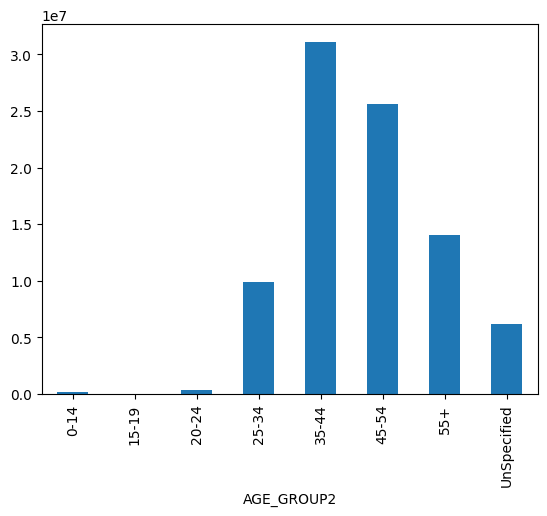

In [55]:
df.groupby('AGE_GROUP2')['NET_SALES_AMOUNT'].sum().plot(kind='bar')

<Axes: xlabel='DIV_NAME'>

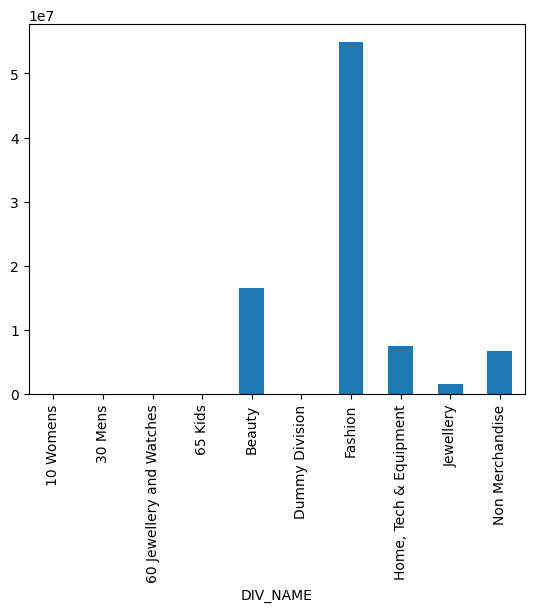

In [57]:
df.groupby('DIV_NAME')['NET_SALES_AMOUNT'].sum().plot(kind='bar')